In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('demo1.txt')

In [4]:
x = dataset

# visualising the dataset for purchasing item(1) by 6 people for the past 16 weeks 

In [5]:
x

,Raj,Kamala,Susmita,Yogesh,Sagar,Manesh
0,11,2,3,4,7,12
1,5,16,8,20,8,23
2,6,29,4,0,6,8
3,3,9,17,16,8,5
4,7,12,6,9,4,1
5,21,12,7,9,10,12
6,6,8,12,4,9,5
7,12,14,18,11,10,9
8,6,9,2,0,4,12
9,0,12,6,8,4,2


# Now taking the profit and sales for 30 days for item(1)

In [6]:
dt = pd.read_excel('Sample.xlsx',sheet_name='Sheet1')

In [7]:
x = dt.iloc[:,:].values


In [8]:
x

array([[  10,   67],
       [  89,    9],
       [  78,    0],
       [  67,   76],
       [  98,   67],
       [  67,   87],
       [  76,   46],
       [ 567,   76],
       [  98,   34],
       [  87,   12],
       [ 678,    6],
       [ 568,   86],
       [  65,   56],
       [  56,   34],
       [  76,    5],
       [  46,   34],
       [  98,   67],
       [  67,    4],
       [  97,   46],
       [   1,    4],
       [1000,   39],
       [  12,   78],
       [  76,   98],
       [1234,   15],
       [ 123,   23],
       [3567,    3],
       [ 567,    0],
       [  87,    9],
       [ 875,   63]], dtype=int64)

# Using the elbow method to find the optimal number of clusters


C:\Users\megha\anaconda3\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[13764717.862068964, 3131783.357142857, 455711.3333333334, 121795.71428571429, 62323.54761904762, 46665.605769230766, 35538.055555555555, 25242.11666666667, 17141.61666666667, 13007.001587301587]


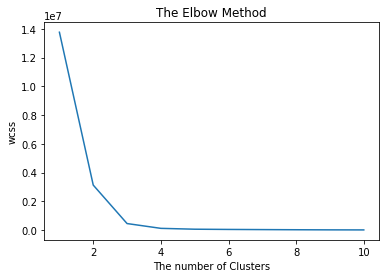

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
print(wcss)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('The number of Clusters')
plt.ylabel('wcss')
plt.show()

# Training the k-means model on dataset

In [10]:
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state = 10)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 2 0 0 2 2 0 0 0 0 0 0 0 0 3 0 0 4 0 1 2 0 3]


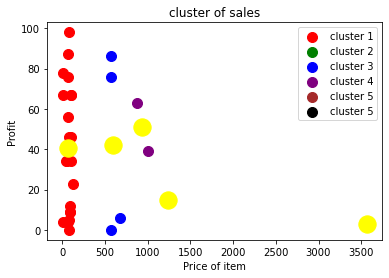

In [11]:
plt.scatter(x[y_kmeans == 0, 0],x[y_kmeans == 0,1], s = 100, c= 'red', label = 'cluster 1')
plt.scatter(x[y_kmeans == 1, 0],x[y_kmeans == 1,1], s = 100, c= 'green', label = 'cluster 2')
plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans == 2,1], s = 100, c= 'blue', label = 'cluster 3')
plt.scatter(x[y_kmeans == 3, 0],x[y_kmeans == 3,1], s = 100, c= 'purple', label = 'cluster 4')
plt.scatter(x[y_kmeans == 4, 0],x[y_kmeans == 4,1], s = 100, c= 'brown', label = 'cluster 5')
plt.scatter(x[y_kmeans == 5, 0],x[y_kmeans == 5,1], s = 100, c= 'black', label = 'cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow')
plt.title('cluster of sales')
plt.xlabel('Price of item')
plt.ylabel('Profit')
plt.legend()
plt.show()